# Solar Power Forecasting Using Vector Auto Regression

1. Read labeled data from output.xlsx
2. Set forecast_days
3. Generate probabilistic labels
4. Run VAR

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
#run mark

In [3]:
forecast_days = 10

In [4]:
xls = pd.ExcelFile("output.xlsx")

In [5]:
years = ["2012","2013","2014","2015","2016","2017","2018","2019","2020"]

In [6]:
df_obj = dict()
for i in years:
    df_obj[i] = pd.read_excel(xls, i)
    df_obj[i] = df_obj[i].drop(["Unnamed: 0"],axis=True)

## Forecasting start

In [7]:
df_obj['2015'].columns

Index(['Date', '1104500527', '1104500529', '1.104501e+09', '7802195.0',
       '2100570073/ 2100567820/ 2100567898', 'Total Generation (KWH)',
       'Aggregate Meter Reading (KWH)', 'Difference', 'SEEDs data (KWH)',
       'Insolation', 'PR (%)', 'Any Issues/Problems Observed', 'WO#',
       'NO-OFF-CLEAN MODULES', 'Grid Failure', 'Inverter', 'Module Cleaning',
       'Rainy day', 'No Module Cleaning',
       'Transformer replacement and maintenance', 'Cable and Fuse maintenance',
       'Plant Shutdown', 'Internet', 'Battery', 'Cloudy',
       'Module Cleaning by rains'],
      dtype='object')

In [8]:
df = df_obj['2012']
# df = df.append(df_obj['2016'])
for i in range(2013,2019):
    df = df.append(df_obj[str(i)])
    
df1 = df.drop([
                    "1104500527", "1104500529", "1.104501e+09", "7802195.0", "2100570073/ 2100567820/ 2100567898", 
                    "Aggregate Meter Reading (KWH)", 
                    "Difference", "SEEDs data (KWH)",  
                    "PR (%)", "Any Issues/Problems Observed", "WO#"], axis=1)

C:\Users\Rajeshsingh\AppData\Local\Temp\ipykernel_30296\2648422872.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_obj[str(i)])
C:\Users\Rajeshsingh\AppData\Local\Temp\ipykernel_30296\2648422872.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_obj[str(i)])
C:\Users\Rajeshsingh\AppData\Local\Temp\ipykernel_30296\2648422872.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_obj[str(i)])
C:\Users\Rajeshsingh\AppData\Local\Temp\ipykernel_30296\2648422872.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_obj[str(i)])
C:\Users\Rajeshsingh\AppData\Local\Temp\ipyk

In [9]:
df1['Insolation'] = df1['Insolation'].fillna(df1['Insolation'].mean())
# df1 = df1.fillna(0)

In [10]:
df1['NO-OFF-CLEAN MODULES'] = df1['NO-OFF-CLEAN MODULES'].replace(r'^\s*$', np.nan, regex=True)
df1['NO-OFF-CLEAN MODULES'] = df1['NO-OFF-CLEAN MODULES'].fillna(0)

In [11]:
df1['NO-OFF-CLEAN MODULES'] = pd.to_numeric(df1['NO-OFF-CLEAN MODULES'])

In [12]:
df1

,Date,Total Generation (KWH),Insolation,Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains,NO-OFF-CLEAN MODULES
0,2012-07-06,3218.00,9.37536,1,0,0,0,0,0,0,0,0,0,0,0,0.0
1,2012-07-07,3633.00,9.37536,1,0,0,0,0,0,0,0,0,0,0,0,0.0
2,2012-07-08,4377.00,9.37536,0,1,0,0,0,0,0,0,0,0,0,0,0.0
3,2012-07-09,4625.00,9.37536,0,1,0,0,0,0,0,0,0,0,0,0,0.0
4,2012-07-10,648.00,9.37536,0,1,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,4129.29,5.74700,1,0,1,0,0,0,0,0,0,0,0,0,971.0
361,2018-12-28,4266.50,5.68900,0,0,1,0,0,0,0,0,0,0,0,0,0.0
362,2018-12-29,3732.03,5.83400,1,0,1,0,0,0,0,0,0,0,0,0,720.0
363,2018-12-30,4063.88,5.58400,0,1,0,0,0,0,0,0,0,0,0,0,0.0


In [13]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [14]:
df1 = df1.set_index('Date')

In [15]:
# for i in df1.columns[1:]:
#     print(i)
#     temp = df1[i].value_counts().to_dict()
#     print(temp)
#     if 1.0 in temp.keys():
#         df1[str(i)][df1[str(i)] == 1.0] = (temp[1.0]/100)**12

In [16]:
df1.head()

,Total Generation (KWH),Insolation,Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains,NO-OFF-CLEAN MODULES
Date,,,,,,,,,,,,,,,
2012-07-06,3218.0,9.37536,1,0,0,0,0,0,0,0,0,0,0,0,0.0
2012-07-07,3633.0,9.37536,1,0,0,0,0,0,0,0,0,0,0,0,0.0
2012-07-08,4377.0,9.37536,0,1,0,0,0,0,0,0,0,0,0,0,0.0
2012-07-09,4625.0,9.37536,0,1,0,0,0,0,0,0,0,0,0,0,0.0
2012-07-10,648.0,9.37536,0,1,0,0,0,0,0,0,0,0,0,0,0.0


In [17]:
df1['Total Generation (KWH)'] = pd.to_numeric(df1['Total Generation (KWH)'])
df1['Total Generation (KWH)'].dtype

dtype('float64')

In [18]:
corr_df = df1.corr()
# corr_df[corr_df < 0] = 0
corr_df

,Total Generation (KWH),Insolation,Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains,NO-OFF-CLEAN MODULES
Total Generation (KWH),1.000000,-0.024524,-0.130600,-0.314601,0.128121,-0.243720,-0.005216,-0.050500,0.032419,0.014604,0.058770,-0.042502,-0.430203,NaN,-0.009910
Insolation,-0.024524,1.000000,-0.014171,0.003589,-0.019096,-0.007896,-0.005430,-0.002112,-0.005786,-0.000670,-0.001732,-0.003606,-0.010411,NaN,-0.000011
Grid Failure,-0.130600,-0.014171,1.000000,0.057966,0.028741,0.006965,-0.071054,-0.008649,-0.004769,0.027274,0.007146,-0.006409,-0.026162,NaN,0.027293
Inverter,-0.314601,0.003589,0.057966,1.000000,-0.240594,0.345086,-0.065587,0.047602,-0.057207,-0.006944,-0.045619,0.107890,0.170230,NaN,-0.007084
Module Cleaning,0.128121,-0.019096,0.028741,-0.240594,1.000000,-0.097901,-0.138123,0.046175,0.036938,0.028864,-0.103348,-0.076412,-0.206888,NaN,0.029442
Rainy day,-0.243720,-0.007896,0.006965,0.345086,-0.097901,1.000000,-0.026688,0.022688,-0.004281,-0.002826,-0.022166,-0.014764,0.304770,NaN,-0.002883
No Module Cleaning,-0.005216,-0.005430,-0.071054,-0.065587,-0.138123,-0.026688,1.000000,-0.017444,0.008297,-0.003987,-0.031273,-0.020830,0.032792,NaN,-0.004067
Transformer replacement and maintenance,-0.050500,-0.002112,-0.008649,0.047602,0.046175,0.022688,-0.017444,1.000000,-0.015215,-0.001847,-0.014488,-0.009650,-0.027950,NaN,-0.001812
Cable and Fuse maintenance,0.032419,-0.005786,-0.004769,-0.057207,0.036938,-0.004281,0.008297,-0.015215,1.000000,-0.003477,-0.027277,0.054323,-0.014822,NaN,-0.003460
Plant Shutdown,0.014604,-0.000670,0.027274,-0.006944,0.028864,-0.002826,-0.003987,-0.001847,-0.003477,1.000000,-0.003311,-0.002206,-0.009272,NaN,-0.000431


In [19]:
# total_0 = 0
# total_1 = 0
# for i in df1.columns[1:]:
#     value_c = df1[i].value_counts()
#     print(df1[i].value_counts())
#     total_0 += value_c[]

In [20]:
df1 = df1.drop(["Cable and Fuse maintenance","NO-OFF-CLEAN MODULES", "No Module Cleaning","Rainy day", "Insolation" ,"Transformer replacement and maintenance","Plant Shutdown","Internet","Battery","Module Cleaning by rains"], axis=1)
df1

,Total Generation (KWH),Grid Failure,Inverter,Module Cleaning,Cloudy
Date,,,,,
2012-07-06,3218.00,1,0,0,0
2012-07-07,3633.00,1,0,0,0
2012-07-08,4377.00,0,1,0,0
2012-07-09,4625.00,0,1,0,0
2012-07-10,648.00,0,1,0,0
...,...,...,...,...,...
2018-12-27,4129.29,1,0,1,0
2018-12-28,4266.50,0,0,1,0
2018-12-29,3732.03,1,0,1,0


In [21]:
df1

,Total Generation (KWH),Grid Failure,Inverter,Module Cleaning,Cloudy
Date,,,,,
2012-07-06,3218.00,1,0,0,0
2012-07-07,3633.00,1,0,0,0
2012-07-08,4377.00,0,1,0,0
2012-07-09,4625.00,0,1,0,0
2012-07-10,648.00,0,1,0,0
...,...,...,...,...,...
2018-12-27,4129.29,1,0,1,0
2018-12-28,4266.50,0,0,1,0
2018-12-29,3732.03,1,0,1,0


In [22]:
endog_array = df1.to_numpy(dtype=int)

In [23]:
var_model = VAR(endog_array)

In [24]:
var_model.select_order(48).summary()

,AIC,BIC,FPE,HQIC
0,6.275,6.288,531.3,6.280
1,3.395,3.470,29.82,3.422
2,3.140,3.276,23.11,3.190
3,3.041,3.239,20.92,3.113
4,2.998,3.258,20.04,3.092
5,2.966,3.288,19.42,3.084
6,2.942,3.326,18.95,3.082
7,2.695,3.141*,14.81,2.858
8,2.647,3.154,14.11,2.832*
9,2.644,3.214,14.07,2.852


In [25]:
results = var_model.fit(15, trend='c', ic='aic')

In [26]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 23, Dec, 2022
Time:                     18:30:06
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    3.51735
Nobs:                     2355.00    HQIC:                   2.92594
Log likelihood:          -19374.5    FPE:                    13.2944
AIC:                      2.58723    Det(Omega_mle):         11.3422
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const        429.308862       103.472155            4.149           0.000
L1.y1          0.565818         0.021648           26.137           0.000
L1.y2         96.226095        31.150276            3.089           0.002
L1.y3        -94.

0.021648100160669714
0.024771498679911134
0.02483676245533021
0.02484293566716312
0.02485842128766958
0.02494038762929336
0.02494226924866748
0.024933831372270194
0.024951523287980438
0.02499256781209973
0.024856171237430127
0.024763893249157908
0.024791016757388814
0.024788014767129548
0.021828458838513243


Text(0, 0.5, 'std. error')

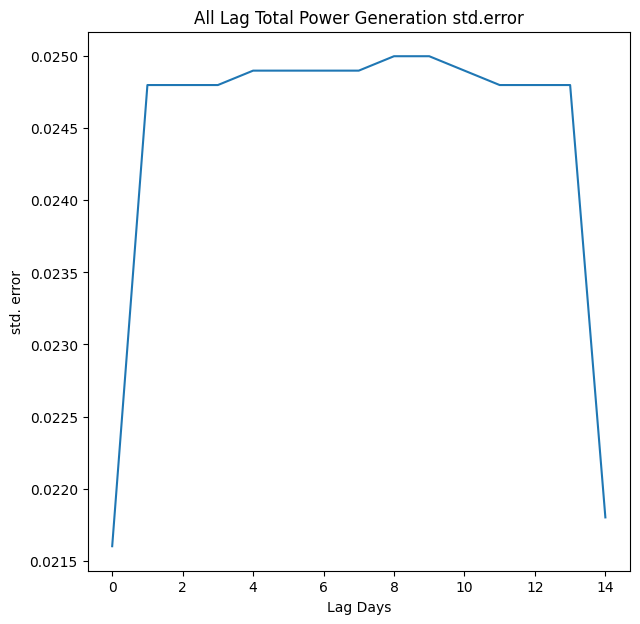

In [27]:
stderr_value = list(results.stderr)[1:]
error_value = []
for i in range(75):
    if i % 5 == 0:
        print(stderr_value[i][0])
        error_value.append(round(stderr_value[i][0],4))
fig = plt.figure(figsize=(7,7))
plt.plot(error_value)    
plt.title("All Lag Total Power Generation std.error")
plt.xlabel('Lag Days')
plt.ylabel('std. error')

In [28]:
# fig.savefig('std_error')

In [29]:
for i in list(results.stderr):
    for j in i:
        print(round(j,3))

103.472
0.071
0.033
0.041
0.027
0.022
0.0
0.0
0.0
0.0
31.15
0.021
0.01
0.012
0.008
67.859
0.046
0.022
0.027
0.018
54.294
0.037
0.017
0.022
0.014
81.286
0.055
0.026
0.032
0.021
0.025
0.0
0.0
0.0
0.0
31.341
0.021
0.01
0.013
0.008
70.966
0.048
0.023
0.028
0.019
55.56
0.038
0.018
0.022
0.015
90.551
0.062
0.029
0.036
0.024
0.025
0.0
0.0
0.0
0.0
31.38
0.021
0.01
0.013
0.008
71.634
0.049
0.023
0.029
0.019
55.851
0.038
0.018
0.022
0.015
91.038
0.062
0.029
0.036
0.024
0.025
0.0
0.0
0.0
0.0
31.297
0.021
0.01
0.012
0.008
71.63
0.049
0.023
0.029
0.019
56.242
0.038
0.018
0.022
0.015
91.411
0.062
0.029
0.036
0.024
0.025
0.0
0.0
0.0
0.0
31.287
0.021
0.01
0.012
0.008
71.512
0.049
0.023
0.029
0.019
56.265
0.038
0.018
0.022
0.015
91.623
0.063
0.029
0.037
0.024
0.025
0.0
0.0
0.0
0.0
31.241
0.021
0.01
0.012
0.008
71.31
0.049
0.023
0.028
0.019
56.203
0.038
0.018
0.022
0.015
91.539
0.062
0.029
0.037
0.024
0.025
0.0
0.0
0.0
0.0
31.192
0.021
0.01
0.012
0.008
71.222
0.049
0.023
0.028
0.019
56.133
0.038
0.018
0

In [30]:
for index, i in enumerate(list(results.stderr)):
    print(index, i)

0 [1.03472155e+02 7.06148308e-02 3.31345858e-02 4.12717604e-02
 2.73032639e-02]
1 [2.16481002e-02 1.47738001e-05 6.93230784e-06 8.63474047e-06
 5.71229808e-06]
2 [3.11502756e+01 2.12585835e-02 9.97516172e-03 1.24248569e-02
 8.21964322e-03]
3 [6.78586017e+01 4.63102724e-02 2.17301617e-02 2.70666437e-02
 1.79058928e-02]
4 [5.42935245e+01 3.70527515e-02 1.73862567e-02 2.16559647e-02
 1.43264671e-02]
5 [8.12858784e+01 5.54737509e-02 2.60299392e-02 3.24223584e-02
 2.14489569e-02]
6 [2.47714987e-02 1.69053712e-05 7.93250462e-06 9.88056506e-06
 6.53647125e-06]
7 [3.13406321e+01 2.13884927e-02 1.00361190e-02 1.25007840e-02
 8.26987271e-03]
8 [7.09658945e+01 4.84308521e-02 2.27252010e-02 2.83060442e-02
 1.87258161e-02]
9 [5.55600045e+01 3.79170640e-02 1.77918178e-02 2.21611234e-02
 1.46606540e-02]
10 [9.05509670e+01 6.17967338e-02 2.89968715e-02 3.61179084e-02
 2.38937418e-02]
11 [2.48367625e-02 1.69499106e-05 7.95340385e-06 9.90659671e-06
 6.55369244e-06]
12 [3.13803323e+01 2.14155862e-02 1.00

In [31]:
lag = results.k_ar

In [32]:
forecast_results = results.forecast(df1.values[-lag:],steps=forecast_days)

## Results

In [33]:
forecast_power = []
# insolation_pred = []
grid_pred = []
inverter_pred = []
module_pred = []
module_no_pred= []
cloudy_pred = []
for i in forecast_results:
    forecast_power.append(i[0])
#     insolation_pred.append(i[1])
    grid_pred.append(i[1])
    inverter_pred.append(i[2])
    module_pred.append(i[3])
#     module_no_pred.append(i[5])
    cloudy_pred.append(i[4])

In [34]:
forecast_list_dict = dict()
for col in df1.columns:
    forecast_list_dict[col] = []
for i in forecast_results:
    for j, col_name in zip(range(len(i)), df1.columns):
        forecast_list_dict[col_name].append(i[j]) 

In [35]:
# forecast_list_dict

In [36]:
power_16 = df_obj['2019']['Total Generation (KWH)']
diff_power = pd.DataFrame({"Prediction":forecast_power[:forecast_days],"Original":power_16[:forecast_days],
#                            "Insolation_pred" : insolation_pred[:forecast_days],
                           "Grid_pred":grid_pred[:forecast_days],
                          "Module_pred":module_pred[:forecast_days],
                            "Cloudy_pred":cloudy_pred[:forecast_days],
                          "Inverter_pred":inverter_pred[:forecast_days],
#                            "NO-OFF-CLEAN MODULES" : module_no_pred[:forecast_days]
                          })
diff_power['Difference'] = diff_power['Prediction'] - diff_power['Original']
diff_power

,Prediction,Original,Grid_pred,Module_pred,Cloudy_pred,Inverter_pred,Difference
0,4006.415791,3812.94,0.487502,0.919024,0.013340,0.134071,193.475791
1,4018.499292,3920.74,0.421920,0.938666,-0.020539,0.074634,97.759292
2,4176.960999,4113.45,0.411235,0.924108,-0.006022,0.113328,63.510999
3,4119.503935,3873.59,0.372910,0.883409,-0.001627,0.104822,245.913935
4,3921.924689,3603.61,0.558229,0.943164,0.006326,0.079327,318.314689
5,3916.175485,4401.37,0.394121,0.269509,0.027434,0.299704,-485.194515
6,3903.286758,3852.56,0.548953,0.986328,0.034072,0.063813,50.726758
7,3875.556369,3913.55,0.456653,0.823999,0.074195,0.145397,-37.993631
8,4044.455014,3731.08,0.339145,0.835986,0.033584,0.128262,313.375014
9,3992.133402,4058.75,0.376363,0.850405,0.043758,0.084118,-66.616598


## Plot results

In [37]:
date_list = pd.date_range(start="2019-01-01",end="2019-12-31")
date_list = pd.to_datetime(date_list)
diff_power['Date'] = date_list[:forecast_days]

In [38]:
diff_power

,Prediction,Original,Grid_pred,Module_pred,Cloudy_pred,Inverter_pred,Difference,Date
0,4006.415791,3812.94,0.487502,0.919024,0.013340,0.134071,193.475791,2019-01-01
1,4018.499292,3920.74,0.421920,0.938666,-0.020539,0.074634,97.759292,2019-01-02
2,4176.960999,4113.45,0.411235,0.924108,-0.006022,0.113328,63.510999,2019-01-03
3,4119.503935,3873.59,0.372910,0.883409,-0.001627,0.104822,245.913935,2019-01-04
4,3921.924689,3603.61,0.558229,0.943164,0.006326,0.079327,318.314689,2019-01-05
5,3916.175485,4401.37,0.394121,0.269509,0.027434,0.299704,-485.194515,2019-01-06
6,3903.286758,3852.56,0.548953,0.986328,0.034072,0.063813,50.726758,2019-01-07
7,3875.556369,3913.55,0.456653,0.823999,0.074195,0.145397,-37.993631,2019-01-08
8,4044.455014,3731.08,0.339145,0.835986,0.033584,0.128262,313.375014,2019-01-09
9,3992.133402,4058.75,0.376363,0.850405,0.043758,0.084118,-66.616598,2019-01-10


In [39]:
rmse = mean_squared_error(power_16[:forecast_days],forecast_power)**(1/2)
rmse

235.56175830205754

In [40]:
mae = mean_absolute_error(power_16[:forecast_days],forecast_power)
mae

187.28812211754735

In [41]:
rmspe = round(np.sqrt(np.mean(np.square(((power_16[:forecast_days] - forecast_power) / power_16[:forecast_days])), axis=0))*100,3)
rmspe

5.917

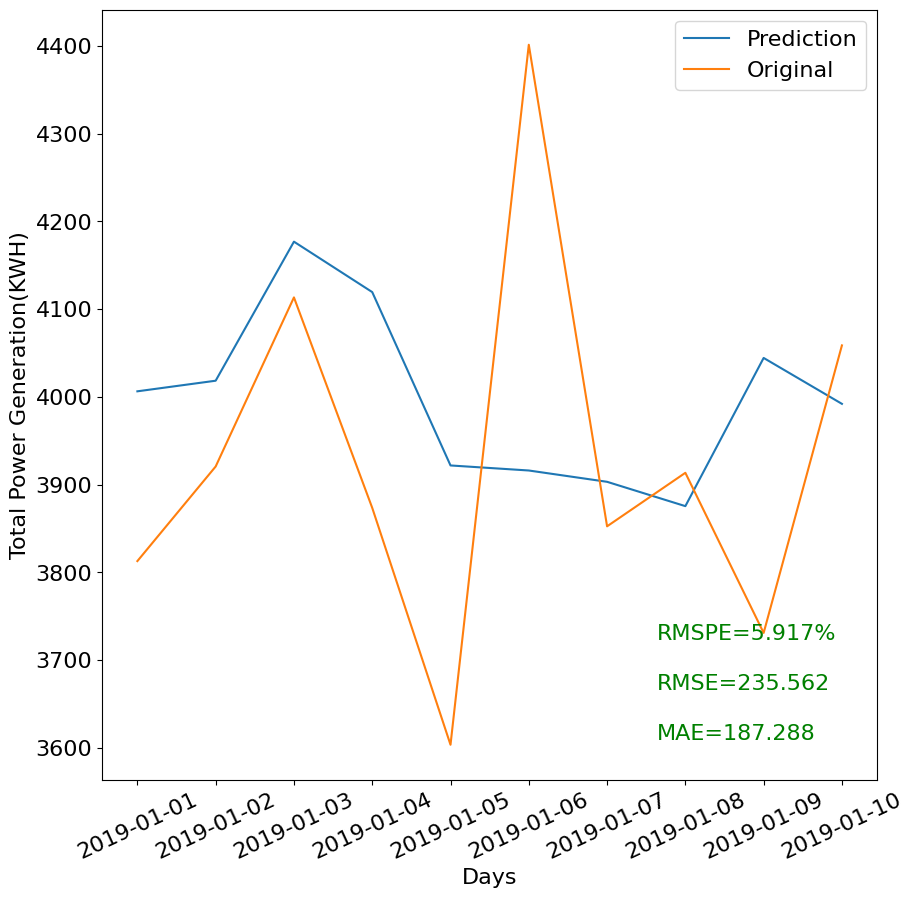

In [42]:
fig = plt.figure(figsize=(10,10))
font = {'size': 16}
plt.rc('font', **font)
plt.plot('Date', 'Prediction', data=diff_power, label='Prediction')
plt.plot('Date', 'Original', data=diff_power, label='Original')
plt.legend()
plt.figtext(.68, .25, "RMSPE="+str(round(rmspe, 3))+"%", c='g')
plt.figtext(.68, .2, "RMSE="+str(round(rmse, 3)), c='g')
plt.figtext(.68, .15, "MAE="+str(round(mae, 3)), c='g')
plt.xticks(rotation=25)
plt.xlabel("Days")
plt.ylabel("Total Power Generation(KWH)")
plt.show()
# plt.title(str(forecast_days)+'_Days Prediction_for_Binary_Var', fontsize=30)

In [43]:
#fig.savefig("result/"+str(forecast_days)+'_Days Prediction_for_Binary', dpi=500)

FileNotFoundError: [Errno 2] No such file or directory: 'result/10_Days Prediction_for_Binary.png'

## Regression conversion

In [ ]:
# new_diff_power = 

## Fetching results

In [ ]:
# writer = pd.ExcelWriter('12_days.xlsx',engine='xlsxwriter')

In [ ]:
# diff_power.to_excel(writer, sheet_name='12_days')

In [ ]:
# writer.save()
# writer.close()

## Check the result with regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df1.head()

,Total Generation (KWH),Grid Failure,Inverter,Module Cleaning,Cloudy
Date,,,,,
2012-07-06,3218.0,1,0,0,0
2012-07-07,3633.0,1,0,0,0
2012-07-08,4377.0,0,1,0,0
2012-07-09,4625.0,0,1,0,0
2012-07-10,648.0,0,1,0,0


In [ ]:
X_train = df1.drop(["Total Generation (KWH)"], axis=1)
Y_train = df1['Total Generation (KWH)']
X_test = diff_power.drop(["Prediction","Original","Difference","Date"], axis=1)

In [ ]:
X_test

,Grid_pred,Module_pred,Cloudy_pred,Inverter_pred
0,0.487502,0.919024,0.013340,0.134071
1,0.421920,0.938666,-0.020539,0.074634
2,0.411235,0.924108,-0.006022,0.113328
3,0.372910,0.883409,-0.001627,0.104822
4,0.558229,0.943164,0.006326,0.079327
5,0.394121,0.269509,0.027434,0.299704
6,0.548953,0.986328,0.034072,0.063813
7,0.456653,0.823999,0.074195,0.145397
8,0.339145,0.835986,0.033584,0.128262
9,0.376363,0.850405,0.043758,0.084118


In [ ]:
Y_test = diff_power['Original']

In [ ]:
X_test

,Grid_pred,Module_pred,Cloudy_pred,Inverter_pred
0,0.487502,0.919024,0.013340,0.134071
1,0.421920,0.938666,-0.020539,0.074634
2,0.411235,0.924108,-0.006022,0.113328
3,0.372910,0.883409,-0.001627,0.104822
4,0.558229,0.943164,0.006326,0.079327
5,0.394121,0.269509,0.027434,0.299704
6,0.548953,0.986328,0.034072,0.063813
7,0.456653,0.823999,0.074195,0.145397
8,0.339145,0.835986,0.033584,0.128262
9,0.376363,0.850405,0.043758,0.084118


In [ ]:
regr = RandomForestRegressor(max_depth=100, random_state=0)
regr.fit(X_train,Y_train)
Y_predrand = regr.predict(X_test)
print(mean_squared_error(Y_test, Y_predrand)**(1/2))
# print(r2_score(Y_test, Y_predrand))

529.6692872966173


In [ ]:
count = list(range(forecast_days))

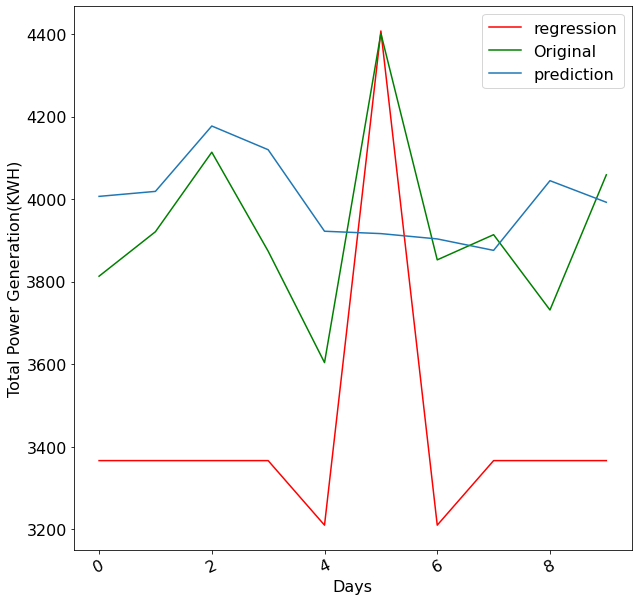

In [ ]:
fig = plt.figure(figsize=(10,10))

plt.plot(count, Y_predrand, c="r", label="regression")
plt.plot(count, Y_test, c="g", label='Original')
plt.plot(count, diff_power['Prediction'], label='prediction')
# plt.figtext(.75, .25, "RMSPE="+str(round(rmspe, 3))+"%", c='g')
plt.legend()
plt.xlabel("Days")
plt.ylabel("Total Power Generation(KWH)")
plt.xticks(rotation=25)
plt.show()

In [ ]:
fig.savefig("result/"+str(forecast_days)+'_Days Prediction_for_regression', dpi=500)

## Thresholding

In [ ]:
threshold_dict = dict()
threshold_dict['Grid_pred'] = 0.4
threshold_dict['Module_pred'] = 0.85
threshold_dict['Cloudy_pred'] = 0.1
threshold_dict['Inverter_pred'] = 0.3


In [ ]:
new_X_test = pd.DataFrame(columns=X_test.columns)

In [ ]:
# new_X_test['Insolation_pred'] = X_test['Insolation_pred']
# new_X_test['NO-OFF-CLEAN MODULES'] = X_test['NO-OFF-CLEAN MODULES']

In [ ]:
for index, row in X_test.iterrows():
    for key in threshold_dict.keys():
        if key in X_test.columns:
            if row[key] >= threshold_dict[key]:
                new_X_test.loc[index, key] = 1
            else:
                new_X_test.loc[index, key] = 0

In [ ]:
new_X_test

,Grid_pred,Module_pred,Cloudy_pred,Inverter_pred
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,0,1,0,0
4,1,1,0,0
5,0,0,0,0
6,1,1,0,0
7,1,0,0,0
8,0,0,0,0
9,0,1,0,0


In [ ]:
Y_predrand_thr = regr.predict(new_X_test)
print(mean_squared_error(Y_test, Y_predrand_thr)**(1/2))

589.8374834950276


In [ ]:
rmspe = round(np.sqrt(np.mean(np.square(((Y_test - Y_predrand_thr) / Y_test)), axis=0))*100,3)
rmspe

15.069

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
all_data_of_2019 = df_obj['2019'][:forecast_days]

In [ ]:
all_data_of_2019

,Date,1104500527,1104500529,1.104501e+09,7802195.0,2100570073/ 2100567820/ 2100567898,Total Generation (KWH),Aggregate Meter Reading (KWH),Difference,SEEDs data (KWH),Insolation,PR (%),Any Issues/Problems Observed,WO#,NO-OFF-CLEAN MODULES,Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains
0,2019-01-01,814.0,990.0,947.0,1024.0,37.94,3812.94,3658.50,154.44,3816.0,5.357,0.694288,"Grid Failure From-15:49 to 15:56, Module Clean...",NaN,524.0,1,0,1,0,0,0,0,0,0,0,0,0
1,2019-01-02,809.0,1023.0,988.0,1063.0,37.74,3920.74,3779.25,141.49,3924.0,5.380,0.710885,"Today morning time Inverter No :-4 ,ABB 250KW ...",NaN,441.0,1,0,1,0,0,0,0,0,0,0,0,0
2,2019-01-03,859.0,1046.0,1049.0,1119.0,40.45,4113.45,3995.25,118.20,4117.0,5.598,0.716804,"Grid Failure From-17:19 to 17:20, Module Clean...",NaN,903.0,1,0,1,0,0,0,0,0,0,0,0,0
3,2019-01-04,803.0,1006.0,978.0,1048.0,38.59,3873.59,3717.75,155.84,3877.0,5.136,0.735738,"Module Cleaning has been done in Row-G,H,I,J,K...",NaN,1281.0,0,0,1,0,0,0,0,0,0,0,0,0
4,2019-01-05,775.0,944.0,907.0,943.0,34.61,3603.61,3465.00,138.61,3607.0,4.808,0.731197,"Module Cleaning has been done in Row-A,B,C,D,E...",NaN,792.0,0,0,1,0,0,0,0,0,0,0,0,0
5,2019-01-06,944.0,1153.0,1109.0,1154.0,41.37,4401.37,4240.50,160.87,4405.0,5.946,0.722061,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
6,2019-01-07,842.0,1007.0,972.0,993.0,38.56,3852.56,3697.50,155.06,3860.0,5.184,0.72573,"Module Cleaning has been done in Row-C,D,E,F ...",NaN,630.0,0,0,1,0,0,0,0,0,0,0,0,0
7,2019-01-08,842.0,1017.0,978.0,1038.0,38.55,3913.55,3768.00,145.55,3920.0,5.260,0.726362,"Module Cleaning has been done in Row-,G,H,I,J,...",NaN,936.0,0,0,1,0,0,0,0,0,0,0,0,0
8,2019-01-09,798.0,955.0,928.0,1013.0,37.08,3731.08,3588.75,142.33,3735.0,5.008,0.726907,"Grid Failure From-12:28 to 12:35, Module Clean...",NaN,816.0,1,0,1,0,0,0,0,0,0,0,0,0
9,2019-01-10,847.0,1035.0,1033.0,1104.0,39.75,4058.75,3912.00,146.75,4062.0,5.336,0.741954,"Module Cleaning has been done in Row-K,L,M,N, ...",NaN,987.0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
rmspe = round(np.sqrt(np.mean(np.square(((Y_test - Y_predrand_thr) / Y_test)), axis=0))*100,3)
rmspe

15.069

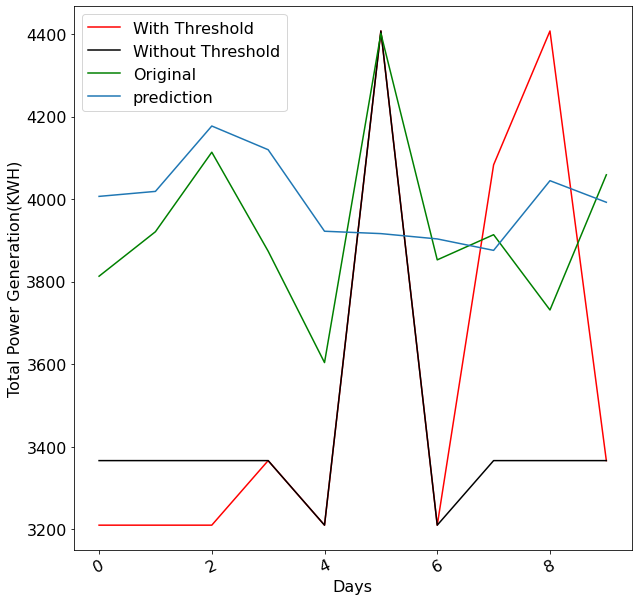

In [ ]:
fig = plt.figure(figsize=(10,10))

plt.plot(count, Y_predrand_thr, c="r", label="With Threshold")
plt.plot(count, Y_predrand, c="black", label="Without Threshold")
plt.plot(count, Y_test, c="g", label='Original')
plt.plot(count, diff_power['Prediction'], label='prediction')
# plt.figtext(.15, .75, "RMSPE="+str(round(rmspe, 3))+"%", c='g')
plt.legend()
plt.xlabel("Days")
plt.ylabel("Total Power Generation(KWH)")
plt.xticks(rotation=25)
plt.show()

In [ ]:
fig.savefig("result/"+str(forecast_days)+'_Days Prediction_for_threshold_without_threshold_regression', dpi=500)

## Arima

In [ ]:
import statsmodels as sm
from statsmodels.tsa.vector_ar.var_model import 

SyntaxError: invalid syntax (576078763.py, line 2)

In [ ]:
mod = sm.tsa.VARMAX()
# endog, order = (1, 0, 0))

In [ ]:
res_default_timeseries = sm.tsa.vector_ar.var_model.TimeSeriesModel(endog_array)

In [ ]:
res_default_timeseries.predict(df1[:forecast_days])